

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction I

**dataset**: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

**Dataset Description**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- **`PatientId`**: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.  
- **`AppointmentID`**: indicates appoint ID, this field should be unique
- **`Gender`**: indicates the patient's gender (M/F)     
- **`ScheduledDay`**: indicates the Date/Time the patient set up their appointment.
- **`AppointmentDay`**:  indicates the date/time the patient called to book their appointment.
- **`Age`**: indicates the patient's age.
- **`Neighborhood`**: indicates the location of the hospital.
- **`Scholarship`**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **`Hipertension`**: indicates whether or not the patient is experiencing Hypertension.
- **`Diabetes`**: indicates whether or not the patient is experiencing Diabetes.
- **`Alcoholism`**: indicates whether or not the patient is experiencing Alcoholism.
- **`Handcap`**: indicates whether or not the patient is with special needs.
- **`SMS_received`**: indicates whether or not the patient has received a reminder text message.
- **`Show-up`**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
- there are some questions about this data
#### Question 1  Are there more no-shows with alcoholism or vice versa?
#### Question 2  (Does the gender influence whether one shows up to appointments or not?)
#### Question 3: How many patients were in each age group?

In [55]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## 1. Data Wrangling



### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data
df  = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [57]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
df.shape

(110527, 14)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In the next cells, we will identify the data format and types (Quantitative vs. Categorical) of each column to help us plan and determine the best data analysis strategy to approach this dataset. In order to do that; at first, we will plot the dataframe data using seaborn **`pariplot()`** function to gain a preliminary understanding for the data types; next, we will identify the data type of each column individually using Pandas **`unique()`** function to confirm the data type and decide on the type of analysis we will conduct.

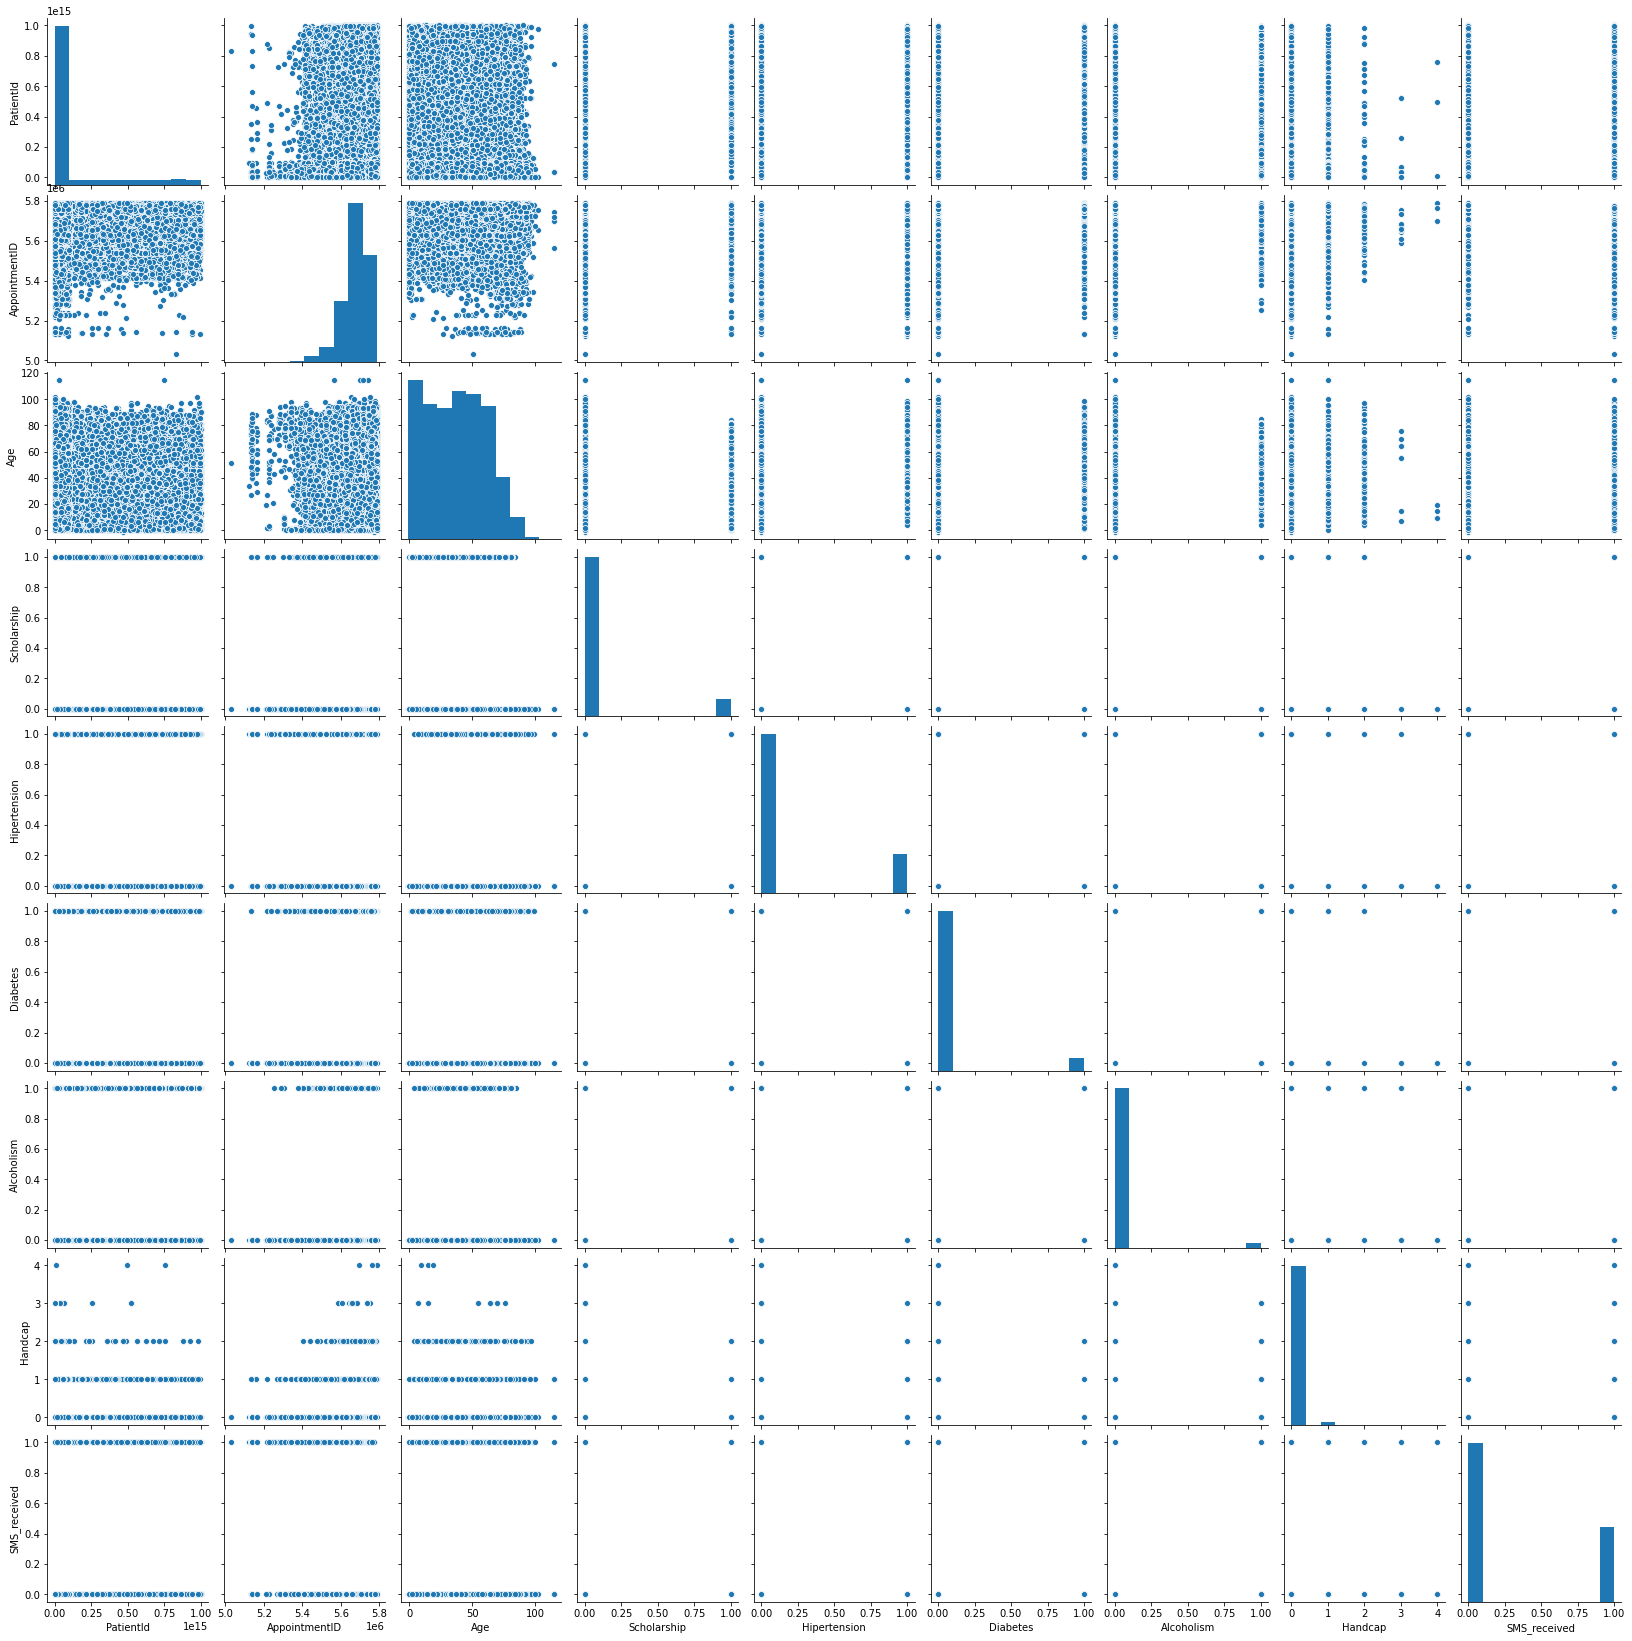

In [60]:
sns.pairplot(df);

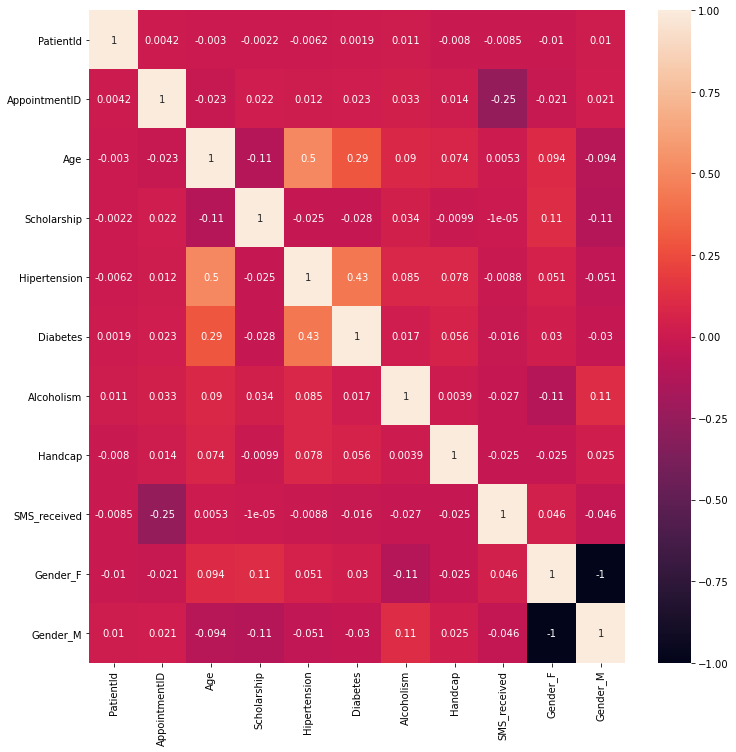

In [93]:
fig, axis = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), ax=axis, annot=True);

we see that here the data frame includes the two types of data:

1. **Categorical Data:** Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
2. **Quantitative Data:** PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

### 2. Missing/Duplicated/Incorrect Data Validation

In [61]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [62]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [63]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [64]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

In [67]:
df['Age'].min()

-1

In [68]:
df.Age.max()

115

In [69]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [94]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [95]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

**Summary:**  we explored each column individually to confirm the existence of  any data errors, so they can be fix/eliminate them in the next step; we also identified the data types and determined how we are going to use each column in our analysis, please see the summary below:

- **`PatientId`**: (Quantitative - Discrete): as mentioned above, a number of patients have more than one appointment; this column will be used in the analysis as applicable.
- **`AppointmentID`**: Quantitative - Discrete (unique values): will be considered the primary key in our dataset;
- **`Gender`**: (Categorical - Nominal)     
- **`ScheduledDay`**: (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date.
- **`AppointmentDay`**:  (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date and to create a new column (DayOfWeek).
- **`Age`**: (Quantitative - Continuous): we will use this column to create age groups.
- **`Neighborhood`**: (Categorical - Nominal) will limit our analyasis to top 20 neighbourhoods that have the highest numbers of appointments.
- **`Scholarship`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Hipertension`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Diabetes`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Alcoholism`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Handcap`**: (Categorical - Ordinal): we will use this column to categorize our results as applicable.
- **`SMS_received`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Show-up`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.


# Notes of the data wrangling.
#### Age column has a negative number and an unsuitable numbers 
#### categorical data should be deleted as it doesn't make sense in data 

- Neighbourhood




### Data Cleaning (prepare the data to its proper format)
- Drop duplicated rows 
- drop nan values
- Delete the categorical 
- drop the negative or zero value in the column age


In [71]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
df = df.drop(['Neighbourhood'] , axis =1)

In [73]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [74]:
d = df.query('Age ==-1')

In [75]:
d.duplicated()

99832    False
dtype: bool

In [76]:
df.drop(df.index[99832], inplace=True)

In [77]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [78]:
df.Age.min()

0

In [79]:
df = df.replace({'Age':{0: np.nan}})

In [80]:
df = df.dropna(subset=['Age'])

In [81]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,0,1,1,0,0,0,No


In [82]:
df.Age.min()

1.0

In [83]:
df = pd.get_dummies(data= df , columns = ['Gender'])

In [84]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,0,1,1,0,0,0,No,1,0


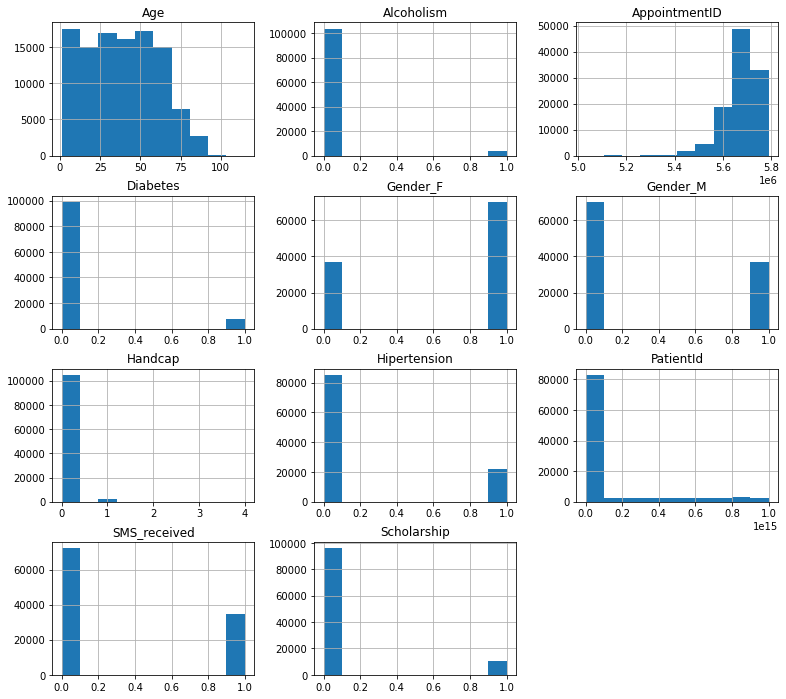

In [85]:
df.hist(figsize = (13,12));

In [98]:
#creating binning function for cutting of ages column

def binning(dataframe, cut_points, labels=None):
    #Define min and max values
    minimum = dataframe.min()
    maximum = dataframe.max()
    
    #create list by adding min and max to cut_points
    break_points = [minimum] + cut_points + [maximum]
    
    #Binning using cut function of pandas
    dataframeBin = pd.cut(dataframe, bins = break_points, labels = labels, include_lowest = True)
    return dataframeBin

#Binning age:
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["child","teen","young_adult","40s", "50s", "retirement", "70s", "80s", "90s", "100s", "centenarian"]
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
print(pd.value_counts(df["Age_Bin"], sort = False))

child          15210
teen           13099
young_adult    13783
40s            15052
50s            14420
retirement     15661
70s            11189
80s             5721
90s             2544
100s             301
centenarian        7
Name: Age_Bin, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1  Are there more no-shows with alcoholism or vice versa?

In [86]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [87]:
df.shape

(106987, 14)

In [88]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,0,1,1,0,0,0,No,1,0


In [89]:
df.groupby(["No-show", "SMS_received"]).size()

No-show  SMS_received
No       0               60290
         1               25017
Yes      0               12112
         1                9568
dtype: int64

**Answer:**
* 25017 patients did not show up for their appointments and 9568 patients did show up for their appointments.
* Receiving text messages did not influence patients to show up for their appointments.

### Research Question 2  (Does the gender influence whether one shows up to appointments or not?)

In [90]:
df.groupby(['No-show','Gender_F']).size()

No-show  Gender_F
No       0           29464
         1           55843
Yes      0            7405
         1           14275
dtype: int64

In [91]:
df.groupby(['No-show','Gender_M']).size()

No-show  Gender_M
No       0           55843
         1           29464
Yes      0           14275
         1            7405
dtype: int64

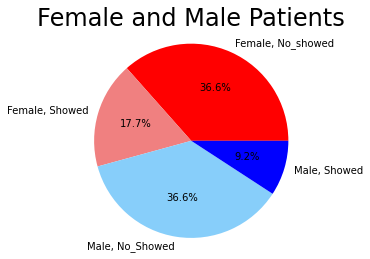

In [104]:
label = 'Female, No_showed', 'Female, Showed', 'Male, No_Showed', 'Male, Showed'
units = [29464, 14275, 29464, 7405 ]
color = ['red', 'lightcoral', 'lightskyblue','blue']

shape, axis = plt.subplots()
axis.pie(units, labels=label, colors=color  ,autopct='%1.1f%%')
plt.title('Female and Male Patients', fontsize= 24)

axis.axis('equal')
plt.show()

* approximately 1/5 of female patients- 17.7% out of 36.6.8% showed up for appointments.
* while approximately 1/4 of male patients- 9.2% out of 36.6% showed up for appointments. 
* Being a male influences one to show up to appointments more.

### Research Question 3: How many patients were in each age group?

In [102]:
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
# run the groupby function
df.groupby(['No-show', 'Age_Bin']).size()

No-show  Age_Bin    
No       child          12061
         teen            9791
         young_adult    10389
         40s            11820
         50s            11550
         retirement     12940
         70s             9541
         80s             4832
         90s             2137
         100s             242
         centenarian        4
Yes      child           3149
         teen            3308
         young_adult     3394
         40s             3232
         50s             2870
         retirement      2721
         70s             1648
         80s              889
         90s              407
         100s              59
         centenarian        3
dtype: int64

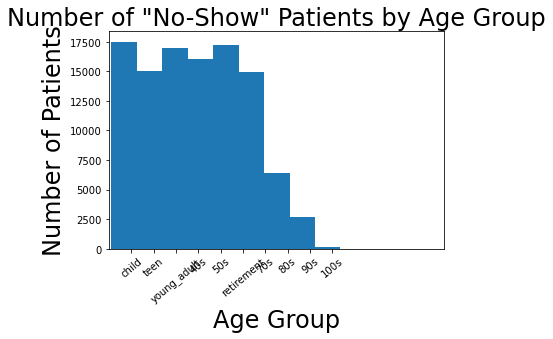

In [103]:
axis = df['Age'].plot(kind='hist')
axis.set_xticks(cut_points)
axis.set_xticklabels(labels, rotation= 40, )

plt.xlabel('Age Group', fontsize= 24)
plt.ylabel('Number of Patients', fontsize=24)
plt.title('Number of "No-Show" Patients by Age Group', fontsize=24)
plt.xlim([0, 150])

# use the magic word to show the bar graph
plt.show()

<a id='conclusions'></a>
## Conclusions

# Reporting my findings of the questions

Here in The first question we can see that the Text Message does not influence patients to show up for appointments.As from the data their are `25017` patients which not show up for the appointment out of `88,207`‬ that means about `29.7%` patients don't show up for appointment. 
* Whereas `9568` patients to show up for their appointments out of `22,319`‬ that means about `43.8%` patients showed up for appointment without getting the Text Message. This conclude that Text Message does not influence the patients to show up for their appointments.
* From second question we are able to find that female population had approximately `1/5` that showed up for their appointments while males had approximately `1/4` that showed up to appointments.
* From the last question we are able to find that, `child` (about `20.2%`) are showed up for the appointments in child age group. Similarly for `50s` age group people that is about 19.9% are showed up for the appointments and for `retirement` age group people that is about `21.02%` are showed up for the appointments.

**Limitations & Assumptions**:

1. Most of the calculations performed in this project are based on the number of apppointments not patients. The calculations where number of patients is referenced are explicitly highlighted. 
2. We were not able to address the time dimenion as the appointments times were set to 00:00:00
3. As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110521
4. As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts; Histograms and other quantitative-related charts such as scatter diagrams, were excluded from this project to the same reason above.
